## Brander & Taylor - 1998 - The simple economics of Easter Island (Python check) 

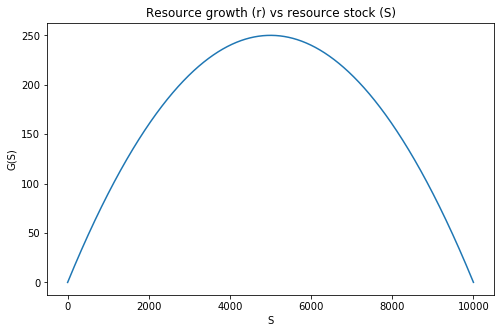

In [28]:
import numpy as np
import matplotlib.pyplot as plt

K=10000 #Carying capacity
S=np.arange(0,K,1)

r=0.1


Gs=r*S*(1-(S/K))

#plotting
plt.plot(S,Gs)
plt.xlabel('S')
plt.ylabel('G(S)')
plt.title('Resource growth (r) vs resource stock (S)')
plt.rcParams["figure.figsize"] =(10,5) 
plt.show()

H<sup>p</sup> = `α.S.L`, where α is a constant determining how much is harvested at a given S and L.

### Deducing function for the price producers charge for harvesting one unit S
- a is the "unit labor requirement", which states how many units of labor is required for one unit of harvest
    - a=L<sub>H</sub>/H<sup>P</sup>  
- If you replace the denominator of this function with the main function (H<sup>p</sup> = α.S.L) then you get:
    - a = L<sub>H</sub>/α.S.L = 1/(α.S)
- So that's how many units of labour you need for harvesting one unit of resource.
- Given that the price of of one unit labor is w (=1M), the price of one unit of harvest is w/(α.S)



### Amount of H people will demand, given a certain price
- Everyone has one unit of labor, for which everyone gets w (1 M)
- People maximise their utility by dividing that 1 M over h and m (individual consumption of H and M)
- u = h<sup>β</sup>m<sup>1-β</sup>
- The population as a whole will spend β.w.L on H. For that, it can buy β.w.L/p units of resource.

### Combining two points above

At a certain S, the harvest has a certain price, and at that price there is a certain demand. That's the amount that will be harvested (assuming a perfect market).

- H<sup>D</sup>=w.β.L.p<sup>-1</sup>
- p=w.(α.S)<sup>-1</sup>  

Putting these two functions together:

- H=w.β.L.(w.(α.S)<sup>-1</sup>)<sup>-1</sup>
- H=w.β.L.(α.S.(w)<sup>-1</sup>)
- H=w.β.L.S*α.w<sup>-1</sup> = α.β.L.S

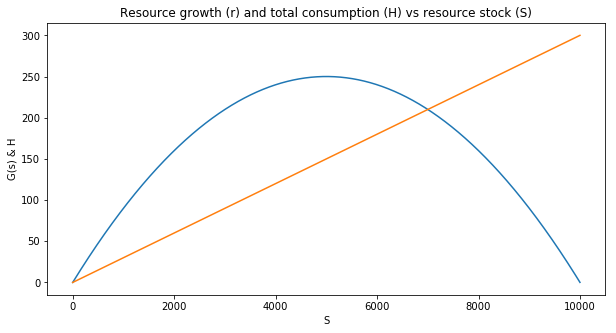

In [29]:
α=0.0001 #measure for how much is harvested, given a certain amount of people, given a certain amount of resources
β=0.1 #how much people like the harvest (over the other thing they can do with their time)
L=3000

Gs=r*S*(1-(S/K))
H=α*β*L*S

plt.plot(S,Gs)
plt.plot(S,H)
plt.xlabel('S')
plt.ylabel('G(s) & H')
plt.title('Resource growth (r) and total consumption (H) vs resource stock (S)')
plt.rcParams["figure.figsize"] =(9,6) 
plt.show()


## Dynamic modelling

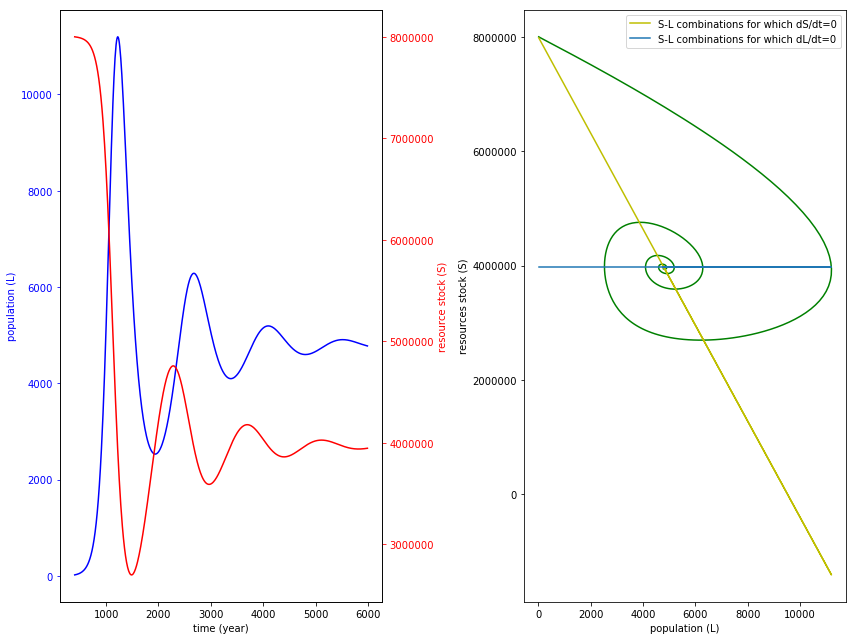

In [39]:
import matplotlib.pyplot as plt
import numpy as np

S=8*10**6
L=20

r=0.004
b=0.02
d=0.03
α=42*10**-8
K=8*10**6
consumptie_respons=0.003

dt=10

S_contain=[]
L_contain=[]
t_contain=[]

t=400

while t < 6000:
    regeneratie = r*S*(1-(S/K))
    consumptie = α*L*S
    dS=(regeneratie-consumptie)
                    
    per_capita=consumptie/L
    consumptievoordeel=consumptie_respons*per_capita
    dL=(((b+consumptievoordeel)-(d-consumptievoordeel))*L)
    
    S=S+dS*dt
    L=L+dL*dt
    
    S_contain.append(S)
    L_contain.append(L)
    t_contain.append(t)
    t=t+dt

# These are the two equilibria: the S-L pairs for which goes that either dS/dt=0 or dL/dt=0.
# N.B. because in the model we subtract the "consumptievoordeel" from the d and add it to the b, it is effectively double the ϕ of the article.
S_eq=(1-(α*np.asarray(L_contain)/r))*K
L_eq=np.full(len(L_contain),(d-b)/(2*consumptie_respons*α))



#Plotting

ax1=plt.subplot(121)
ax1.plot(t_contain,L_contain,'b')
ax1.set_xlabel('time (year)')
ax1.set_ylabel('population (L)',color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(t_contain,S_contain,'r')
ax2.set_ylabel('resource stock (S)',color='r')
ax2.tick_params('y', colors='r')


plt.subplot(122)
plt.plot(L_contain,S_contain,'g')
plt.plot(L_contain,S_eq,'y',label='S-L combinations for which dS/dt=0')
plt.plot(L_contain,L_eq,label='S-L combinations for which dL/dt=0')
plt.xlabel('population (L)')
plt.ylabel('resources stock (S)')
plt.ticklabel_format(style='plain')
plt.legend(['A simple line'])
plt.legend()


plt.tight_layout()
plt.rcParams["figure.figsize"] =(9,12) 
plt.show()
